In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs #cartopy coord ref sys
import cartopy
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [2]:
sst_masked = xr.open_dataarray('sst_masked.nc')

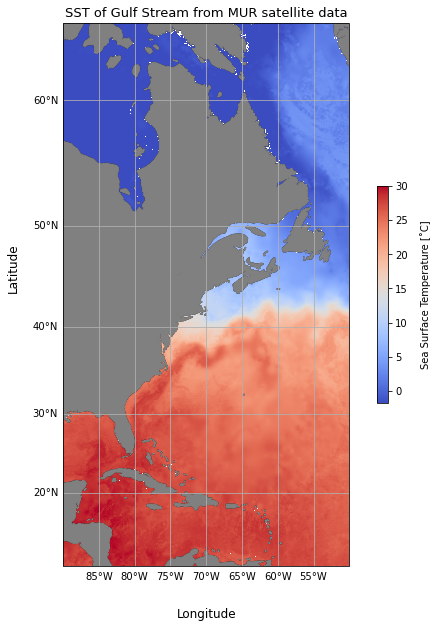

In [6]:
proj = ccrs.Mercator() #with Mercator you can put lat lon values.
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection=proj))

ax.set_extent([-90, -50, 10, 65], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
#ax.add_feature(cfeature.LAND, facecolor='0.8', edgecolor='k')

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='0.5'))

im = ax.pcolormesh(sst_masked.lon, sst_masked.lat, sst_masked, transform=ccrs.PlateCarree(), cmap='coolwarm', vmax=30)
cb = fig.colorbar(im, ax=ax, shrink=0.4)
cb.set_label("Sea Surface Temperature [˚C]", labelpad=12, fontsize=10)

g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
g1.xlabels_top = False
g1.ylabels_right = False

ax.text(-0.15, 0.55, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes, fontsize=12)
ax.text(0.5, -0.1, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes, fontsize=12)

plt.title('SST of Gulf Stream from MUR satellite data', fontsize=13);